# Proyecto 3

## Aprendizaje Colaborativo Internacional en Línea

Esta tarea se encuentra en el marco de la aplicación del programa de Aprendizaje Colaborativo Internacional en Línea (COIL – siglas en inglés de “Collaborative Online International Learning”) de la Asociación de Universidades Confiadas a la Compañía de Jesús en América Latina (AUSJAL).

Identificador de Grupo: 3

Integrantes: 
* Roberto Burgos
* Claudio Garcia
* Maryjose Ramirez
* Nahuel Pacheco (UCU)

Países de Interés: 
* México (MEX)
* Alemania (DEU)
* Corea del Sur (KOR)

Área de Interés: Sostenibilidad; Consumo de Energía Renovable (% del Consumo Total)

Pregunta: ¿Cómo ha evolucionado el consumo de energía renovable entre 1990 y 2021? ¿Cómo se comparan estos países en dicho rango?

In [19]:
import requests, logging, zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from io import BytesIO

In [20]:
INDICATOR = "EG.FEC.RNEW.ZS"
COUNTRIES = "MEX", "DEU", "KOR"
URL = f"https://api.worldbank.org/v2/es/indicator/{INDICATOR}?downloadformat=csv"

In [21]:
res = requests.get(URL)
if not res.ok:
    logging.error("Failed to get data from URL.")

zipdata = zipfile.ZipFile(BytesIO(res.content))

In [22]:
for filename in zipdata.namelist():
    if "Metadata" not in filename:
        filedata = zipdata.open(filename)
        break
else:
    logging.error("Failed to find actual data file inside zip.")

df = pd.read_csv(filedata, skiprows=4)
df.drop(columns=["Country Name", "Indicator Name", "Indicator Code", "Unnamed: 68"], inplace=True)
df = df.query("`Country Code` in @COUNTRIES")

df_melt = df.melt(id_vars=["Country Code"], var_name="Year", value_name="Value")
df_melt.dropna(inplace=True)

Tendencia de MEX: y = -0.117265x + (246.250751)
Tendencia de DEU: y = 0.591111x + (-1176.919391)
Tendencia de KOR: y = 0.089351x + (-177.709402)


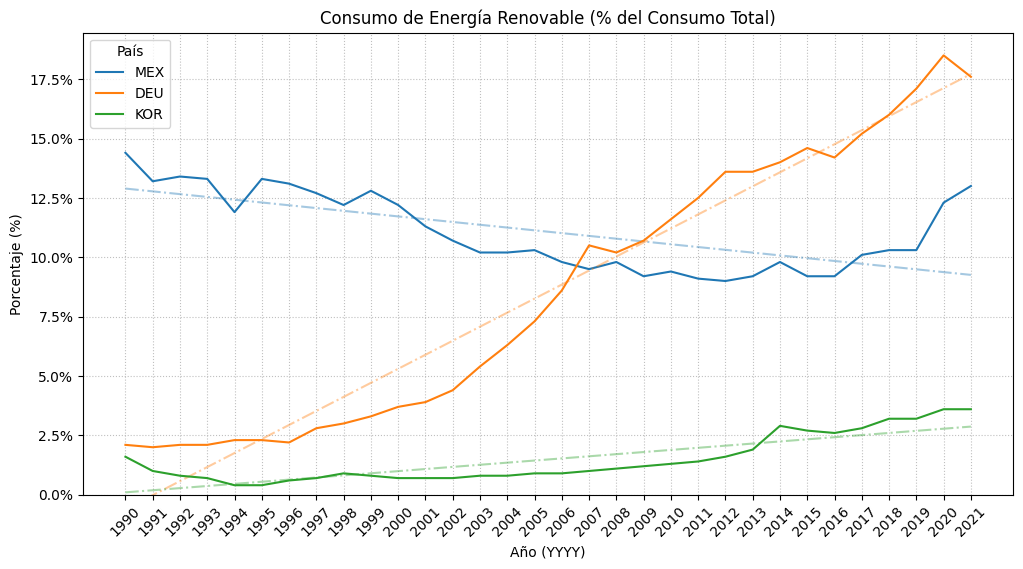

In [23]:
plt.figure(figsize=(12, 6))

for country in COUNTRIES:
    country_data = df_melt[df_melt["Country Code"] == country]
    
    # Draw line
    x, y = country_data["Year"].astype(int), country_data["Value"].astype(float)
    line = plt.plot(x, y, label=country)[0]
    linecolor = line.get_color()
    
    # Draw trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle="-.", alpha=0.4, color=linecolor)

    # Draw trendline equation
    equation = f"y = {z[0]:.6f}x + ({z[1]:.6f})"
    # mid_x = x.mean()
    # plt.text(mid_x, p(mid_x), equation, color=linecolor, fontsize=9, ha="center")
    print(f"Tendencia de {country}: {equation}")

plt.title("Consumo de Energía Renovable (% del Consumo Total)")
plt.xlabel("Año (YYYY)")
plt.ylabel("Porcentaje (%)")

plt.ylim(bottom=0)
plt.xticks(ticks=range(1990, 2022, 1), rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
plt.grid(True, linestyle=":", alpha=0.8)

plt.legend(title="País")

plt.show()

### Conclusiones
* Alemania muestra una tendencia consistentemente ascendente, con un incremento constante en el consumo de energía renovable desde aproximadamente un 2.5% en 1990 hasta un 17.5% en 2021.
  * En el rango 1990 ~ 1996 no parece haber un cambio notable, sino en años posteriores.
* Corea del Sur, similar a Alemania, comienza alrededor de un 2% en 1990, pero muestra un descenso hasta 1995, donde cae cerca del 0.5%. A partir de ese momento, la tendencia cambia, y se comienza a incrementar el consumo de energías renovables, alcanzando aproximadamente 3.25% en 2021.
  * Comparado con los otros dos países, es el que menor variación y menor consumo ha tenido.
* Interesante es el caso de México, quien comienza con un considerablemente alto porcentaje inicial (14.5%~ en 1990), pero muestra una caída significativa hasta 9%~ en 2009, manteniéndose a nivel hasta el 2016, cuando la tendencia comienza a subir nuevamente (casi recuperando su alto porcentaje inicial del 1990).
  * Es el único país con una tendencia general negativa.